# Imports and helpers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
%config InlineBackend.figure_format = 'retina'
np.random.seed(12345)

# Part 1
## Exercise 1
5 pts: For each of the polynomial bases of dimension $k = 1, 2, 3, 4$ fit the   data set of Figure 1 $\{(1, 3), (2, 2), (3, 0), (4, 5)\}$.

(a) Produce a plot similar to Figure 1, superimposing the four different curves corresponding to each fit over the four data points.

(b) Give the equations corresponding to the curves fitted for $k = 1, 2, 3$. The equation corresponding
to $k = 4$ is $-5 + 15.17x  -8.5x^2 + 1.33x^3$.

(c) For each fitted curve $k = 1, 2, 3, 4$ give the mean square error where $MSE = \frac{SSE}{m}$


In [2]:
data = np.array([1,3,2,2,3,0,4,5]).reshape(4, 2)
x = data[:, 0]
y = data[:, 1]

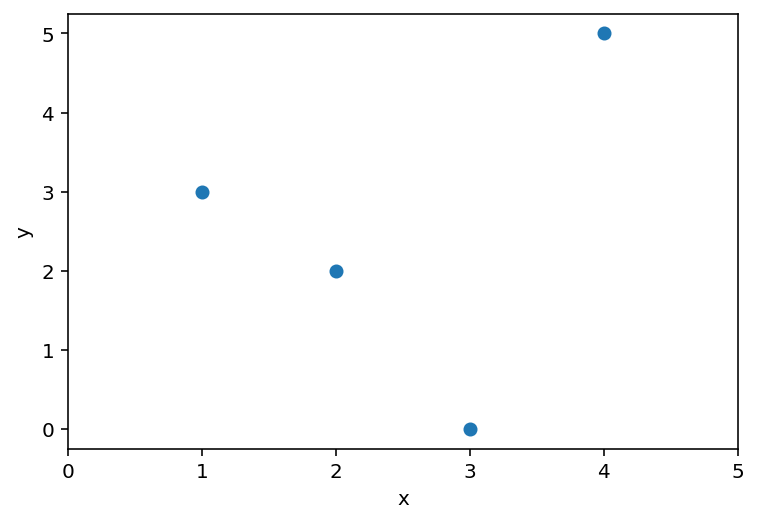

In [3]:
fig, ax = plt.subplots()
ax.scatter(x.astype(int), y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y', xlim = [0, 5]);

In [4]:
def poly_design_matrix(x, order):
  """Create a design matrix of inputs to use in polynomial regression

  Args:
    x (ndarray): input vector of shape (samples,)
    order (scalar): polynomial regression order (k in the exercise sheet)

  Returns:
    ndarray: design matrix for polynomial regression of shape (samples, order)
  """

  # Broadcast to shape (n x 1) to avoid matmul errors or wrong broadcasting
  if x.ndim == 1:
    x = x[:, None]

  # Initialise with columns of one
  design_matrix = np.ones((x.shape[0], 1))

  # Loop through polynomial orders and stack
  for degree in range(1, order + 1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix

In [5]:
def fit_regression(X, y):
  """Calculate regression parameters using ordinary least squares.

  Args:
    X (ndarray): design matrix of shape (n_samples, n_features)
    y (ndarray): vector of measurements of shape (n_samples,)

  Returns:
    ndarray: estimated parameters of shape (n_features,)
  """

  # Compute theta_hat using OLS
  theta_hat = np.linalg.pinv(X.T @ X) @ X.T @ y # Using pseudoinverse to avoid numerical errors with large polynomial orders
  return theta_hat

In [6]:
# Create dictionary containing data entries for each k
data_dict = {order : poly_design_matrix(x, order) for order in range(0, 4)}

In [7]:
# Create dictionary containing optimal OLS params for each k
param_dict = {order : np.squeeze(fit_regression(data_dict[order], y)) for order in range(0, 4)}
param_dict[0] = param_dict[0].reshape(1,1) # need to get the first param as vector, since squeeze returns just the float

In [8]:
# Can easily do point B. by printing the parameter dictionary
print(param_dict)

{0: array([[2.5]]), 1: array([1.5, 0.4]), 2: array([ 9. , -7.1,  1.5]), 3: array([-5.        , 15.16666667, -8.5       ,  1.33333333])}


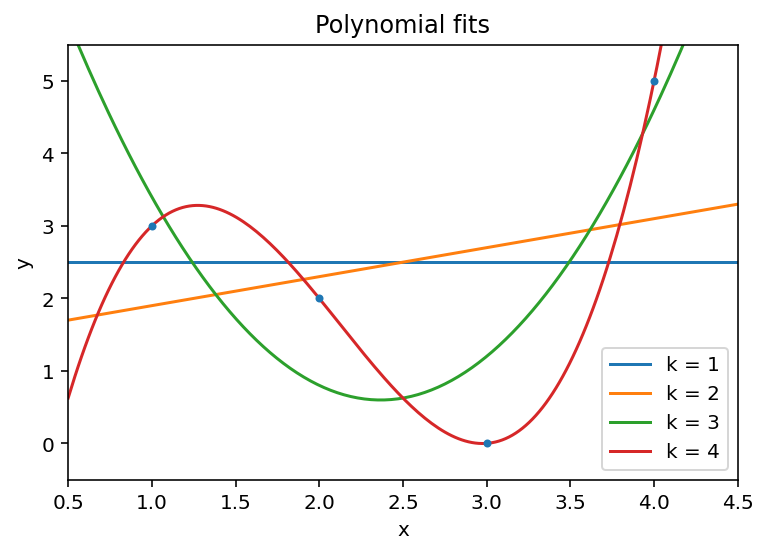

In [9]:
# Part A plot
def plot_poly_fits(x, y, theta_hat):
  """ Plot polynomial fits of different orders

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    theta_hat (dict): polynomial regression weights for different orders
  """

  x_grid = np.linspace(x.min() - .5, x.max() + .5, 200)

  plt.figure()

  for order in theta_hat.keys():
    X_design = poly_design_matrix(x_grid, order)
    plt.plot(x_grid, X_design @ theta_hat[order]);

  plt.ylabel('y')
  plt.xlabel('x')
  plt.xlim((x.min() - .5, x.max() + .5))
  plt.ylim((y.min() - .5, y.max() + .5))
  plt.plot(x, y, 'C0.');
  plt.legend([f'k = {o + 1}' for o in theta_hat.keys()], loc=4)
  plt.title('Polynomial fits')
  plt.show()

plot_poly_fits(x, y, param_dict)

[3.25, 3.0500000000000003, 0.7999999999999984, 1.073055698277662e-23]

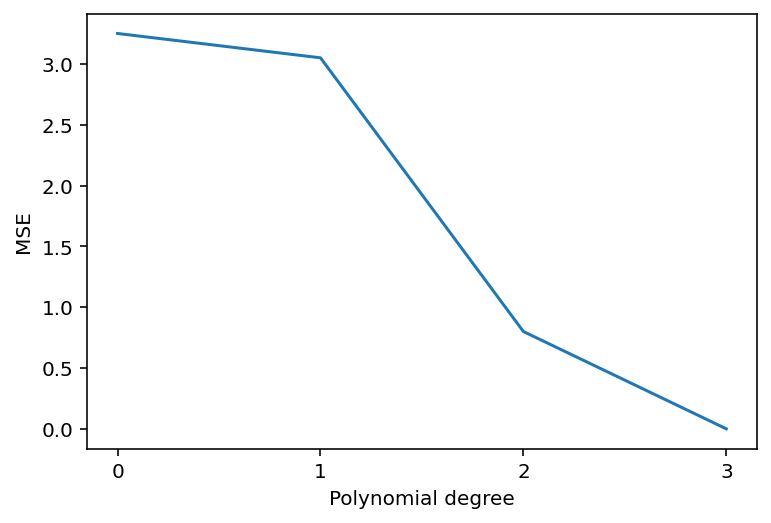

In [10]:
# Point C. Getting the MSE for each fit
def get_mse(data, labels, param_dict, log = False, plot = True):
  """Gets and plots the mean squared error for a given dataset and dictionary of 
  fits

  Args:
    data (ndarray): vector of data
    labels (ndarray): vector of measurements or labels y
    param_dict (dict): polynomial regression weights for different orders

  Returns:
    mse_list (list): list of mean squared errors for each degree, with a plot
  """
  mse_list = []
  order_list = [i for i in param_dict.keys()]

  for order in order_list:

    X_design = poly_design_matrix(data, order)

    # Get prediction for the polynomial regression model of this order
    y_hat = X_design @ param_dict[order]

    # Compute the residuals
    residuals = labels - y_hat

    # Compute the MSE
    mse = np.mean(residuals ** 2)

    mse_list.append(mse)
  
  # Take the log if needed
  if log == True:
    mse_list = [*map(np.log, mse_list)]
    plt.ylabel('MSE (log)')
  else:
    plt.ylabel('MSE')
  # Now plot everything
  if plot == True:
    plt.plot([*map(str, [i for i in param_dict.keys()])], mse_list);
    plt.xlabel('Polynomial degree')

  return mse_list
get_mse(x,y, param_dict, log = False)

## Exercise 1.1.2
In this part we illustrate the phenomenon of overfitting


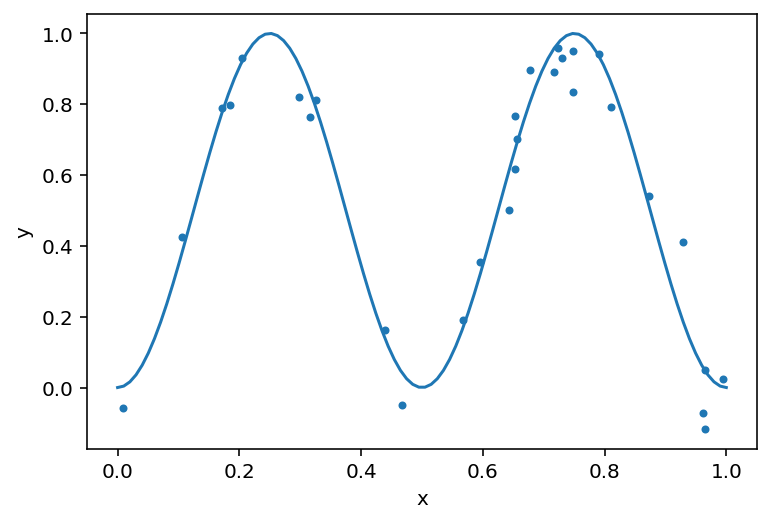

In [11]:
# Point a) i)
# Generating dataset
def g(x, sigma):
  epsilon = np.random.normal(0, sigma, len(x))
  transform = np.square(np.sin(2 * np.pi * x)) + epsilon
  return transform

train_x = np.random.uniform(0, 1, 30)
train_y = g(train_x, 0.07)

# Plotting
x_grid = np.linspace(0 , 1, 100)
plt.figure()
wave = g(x_grid, 0)
plt.plot(x_grid, wave);
plt.plot(train_x, train_y, 'C0.');
plt.ylabel('y')
plt.xlabel('x')
plt.show()

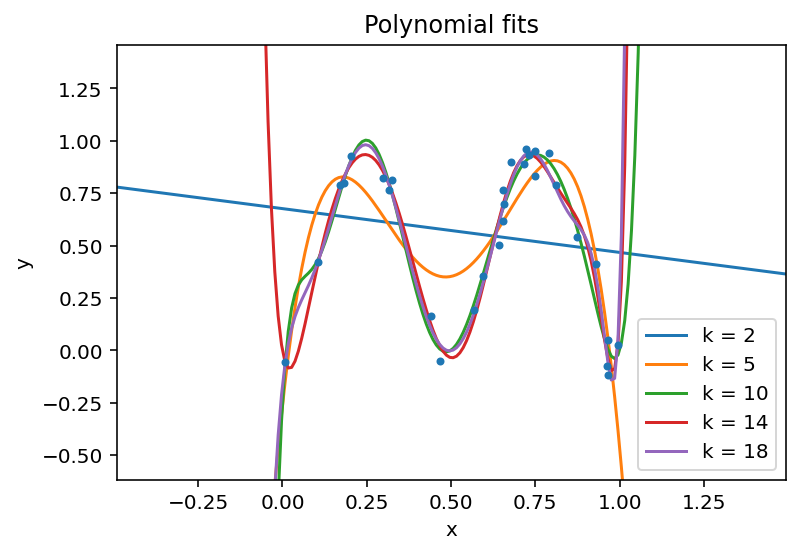

In [12]:
# Point a) ii)
orders = [1, 4, 9, 13, 17]
data_dict_2 = {order : poly_design_matrix(train_x, order) for order in orders}
param_dict_2 = {order : np.squeeze(fit_regression(data_dict_2[order], train_y)) for order in orders}

plot_poly_fits(train_x, train_y, param_dict_2)

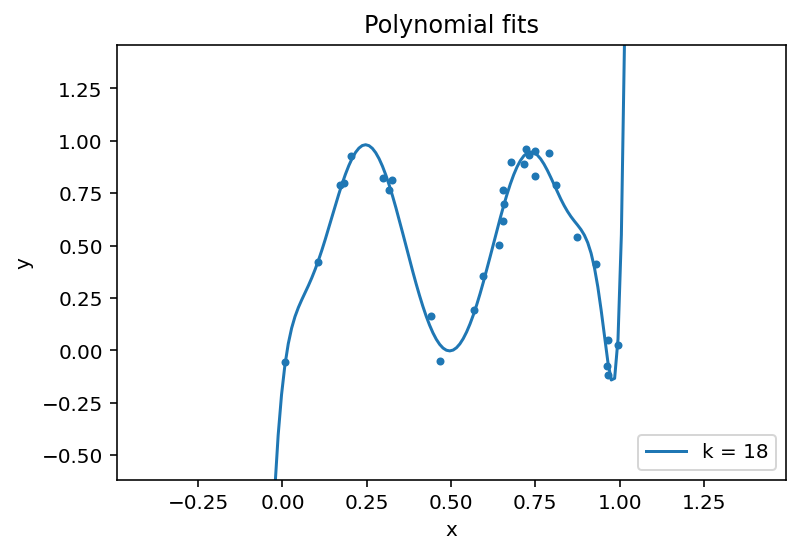

In [13]:
# Can also visualise each fit separately
plot_poly_fits(train_x, train_y, {17 : param_dict_2[17]})

[-2.0491272796652535,
 -2.3367495639928264,
 -2.380541179666983,
 -3.470346524426655,
 -3.4963847546781928,
 -4.846495349526945,
 -4.93338552342122,
 -5.084761362514849,
 -5.273979616956011,
 -5.321500849115429,
 -5.568666389309254,
 -5.588658426740673,
 -5.604104824952981,
 -5.616781904777373,
 -5.653446024425903,
 -5.6661949014114334,
 -5.6783525719831,
 -5.689905222461643]

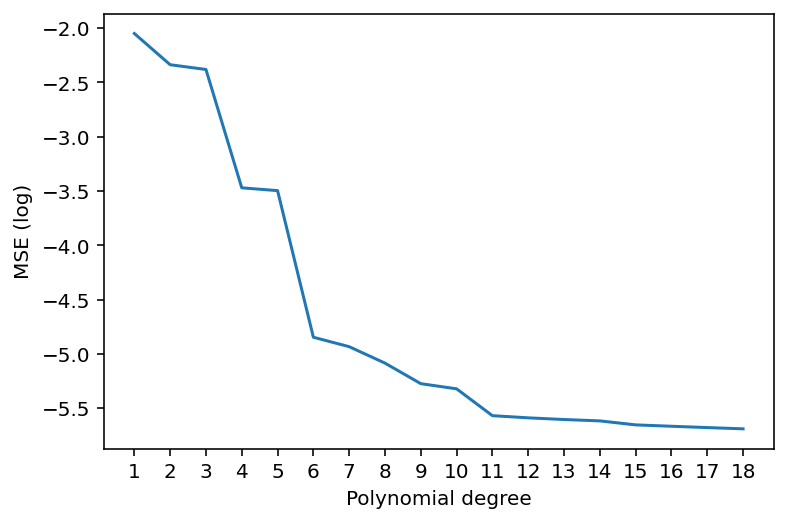

In [14]:
# Calculating the MSE for each polynomial fit to the training set
orders = list(range(1,19))
data_dict_2 = {order : poly_design_matrix(train_x, order) for order in orders} # Getting the design matrix for each order

# Fitting each order
param_dict_2 = {order : np.squeeze(fit_regression(data_dict_2[order], train_y)) for order in orders}

# Evaluating and plotting with previously defined function
get_mse(train_x, train_y, param_dict_2, log = True)

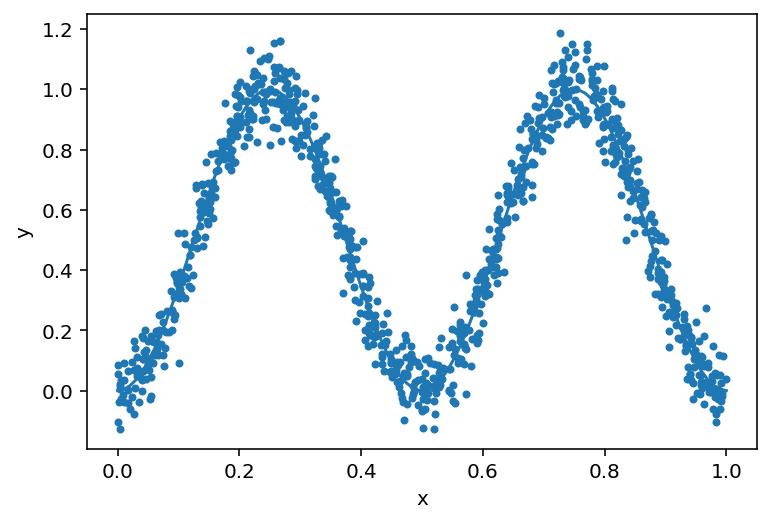

In [15]:
# Generating and plotting test set
test_x = np.random.uniform(0, 1, 1000)
test_y = g(test_x, 0.07)

x_grid = np.linspace(0 , 1, 100)
plt.figure()
wave = g(x_grid, 0)
plt.plot(x_grid, wave);
plt.plot(test_x, test_y, 'C0.');
plt.ylabel('y')
plt.xlabel('x')
plt.show()


[-2.021066590219668,
 -2.044208633267317,
 -2.0504118785118206,
 -3.0255906931934042,
 -3.005905500692277,
 -4.770498955664502,
 -4.615748778563076,
 -5.099286451340251,
 -4.63888715325471,
 -4.724338216563315,
 -4.401262520924071,
 -4.597155416846292,
 -4.675842388857417,
 -4.701609553788496,
 -4.585012817268326,
 -4.596113304818052,
 -4.60515848207951,
 -4.611743305528957]

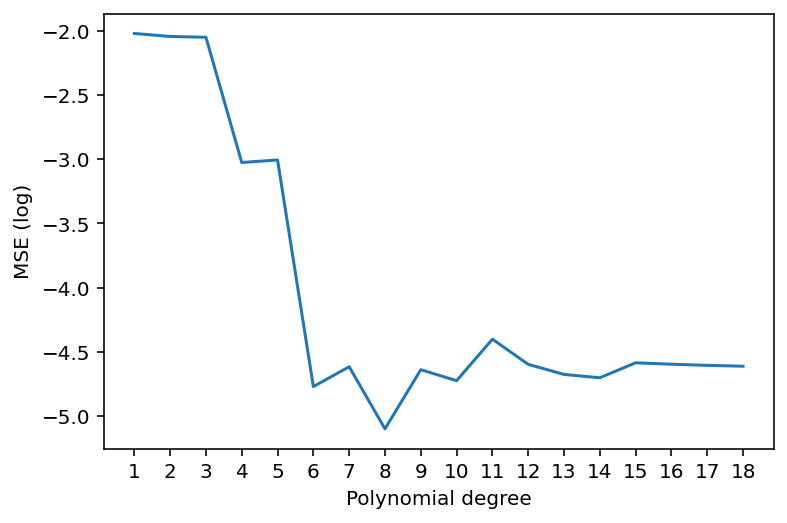

In [16]:
# Evaluating performance on the test set:
get_mse(test_x, test_y, param_dict_2, log = True)

## Exercise 1.1.2 d)

In [17]:
def get_mse_plots(data, labels, param_dict, alpha = 0.5, log = False, plot = True):
  """Gets and plots the mean squared error for a given dataset and dictionary of 
  fits. This function is designed to work with repeated runs, plotting each run on the same graph.

  Args:
    data (ndarray): vector of data
    labels (ndarray): vector of measurements or labels y
    param_dict (dict): polynomial regression weights for different orders

  Returns:
    Nothing. But plots the mse over different fits.
  """
  mse_list = []
  order_list = [i for i in param_dict.keys()]

  for order in order_list:

    X_design = poly_design_matrix(data, order)

    # Get prediction for the polynomial regression model of this order
    y_hat = X_design @ param_dict[order]

    # Compute the residuals
    residuals = labels - y_hat

    # Compute the MSE
    mse = np.mean(residuals ** 2)

    mse_list.append(mse)
  
  # Take the log if needed
  if log == True:
    mse_list = [*map(np.log, mse_list)]
    plt.ylabel('MSE (log)')
  else:
    plt.ylabel('MSE')
  # Now plot everything
  if plot == True:
    plt.plot([*map(str, [i for i in param_dict.keys()])], mse_list, alpha = alpha);
    plt.xlabel('Polynomial degree')

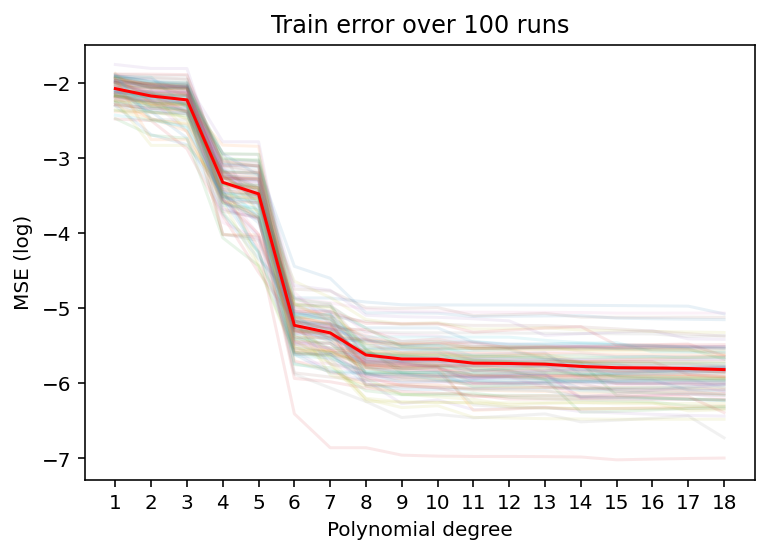

In [18]:
# Part d) Doing 100 runs of the previous
orders = list(range(1, 19))
# First doing 100 trains
mse_train_100 = np.empty((5,1))
thetas_superdict = {} # Need to collect all these thetas in a super-dictionary we can use for train
for epoch in range(100):
  # print(f'Running epoch {epoch}')
  np.random.seed(epoch + 2000) # Set a new seed for each run
  data = np.random.uniform(0, 1, 30) # Sample a random set of data x
  labels = g(data, 0.07) # Generates a random set of labels y
  design_matrix = {order : poly_design_matrix(data, order) for order in orders}
  thetas = {order : np.squeeze(fit_regression(design_matrix[order], labels)) for order in orders}
  thetas_superdict[epoch] = thetas
  mses = np.array(get_mse(data, labels, thetas, log = False, plot = False))
  just_for_plotting = get_mse_plots(data, labels, thetas, alpha = 0.1, log = True, plot = True) # to plot all runs
  if epoch == 0:
    mse_train_100 = mses[:, None]
  else:
      mse_train_100 = np.hstack((mse_train_100, mses[:,None]))
  
plt.ylabel('MSE (log)')
plt.title('Train error over 100 runs')
plt.xlabel('Polynomial degree')
plt.plot([*map(str, [i for i in thetas.keys()])], np.log(np.mean(mse_train_100, axis = 1)), color = 'red');

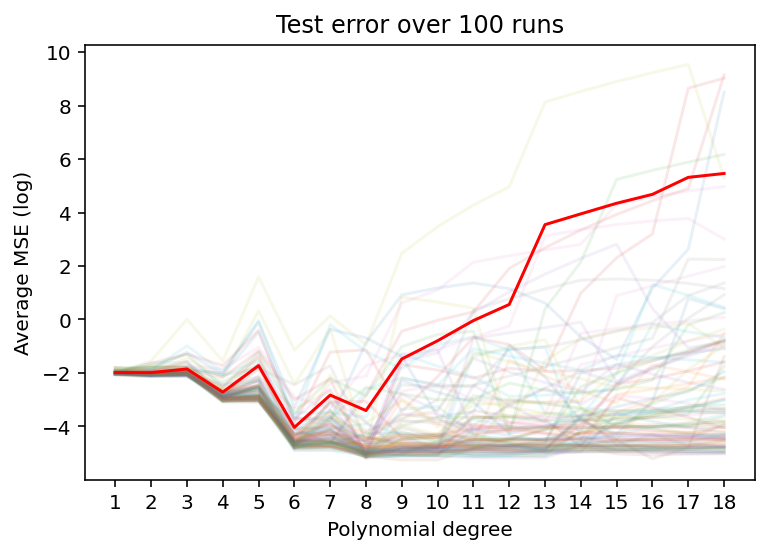

In [19]:
# Now doing 100 tests
mse_test_100 = np.empty((5,1))
for epoch in range(100):
  # print(f'Running epoch {epoch}')
  np.random.seed(epoch + 2000) # Set a new seed for each run
  data = np.random.uniform(0, 1, 1000) # Sample a random set of data x
  labels = g(data, 0.07) # Generates a random set of labels y
  design_matrix = {order : poly_design_matrix(data, order) for order in orders}
  thetas = thetas_superdict[epoch]
  mses = np.array(get_mse(data, labels, thetas, log = False, plot = False))
  just_for_plotting = get_mse_plots(data, labels, thetas, alpha = 0.1, log = True, plot = True) # to plot all runs

  if epoch == 0:
    mse_test_100 = mses[:, None]
  else:
      mse_test_100 = np.hstack((mse_test_100, mses[:,None]))

plt.ylabel('Average MSE (log)')
plt.title('Test error over 100 runs')
plt.xlabel('Polynomial degree')
plt.plot([*map(str, [i for i in thetas.keys()])], np.log(np.mean(mse_test_100, axis = 1)), color = 'red');

## Exercise 1.1.3
Sinusoidal basis functions

In [20]:
def make_design_sinusoidal(x, k):
  """Create the design matrix of inputs to use in regression with sinusoidal basis functions

  Args:
    x (ndarray): input vector of shape (samples,)
    k (scalar): dimension of sinusoidal basis. For k = 1 -> sin(1*pi*x)

  Returns:
    ndarray: design matrix for 'nonlinear' regression of shape (samples, k)
  """
  if x.ndim == 1:
    x = x[:, None]
  design_matrix = np.sin(1 * np.pi * x)

  # design_matrix = np.empty((x.shape[0], k))
  # Loop through k
  for i in range(2, k+1):
      design_matrix = np.hstack((design_matrix, np.sin(i * np.pi * x)))

  return design_matrix


In [21]:
# Generating the Design matrices and fitting parameters
sinusoidal_designs = {order : make_design_sinusoidal(train_x, order) for order in range(1,19)}
sinusoidal_thetas = {order : fit_regression(sinusoidal_designs[order], train_y) for order in range(1, 19)}

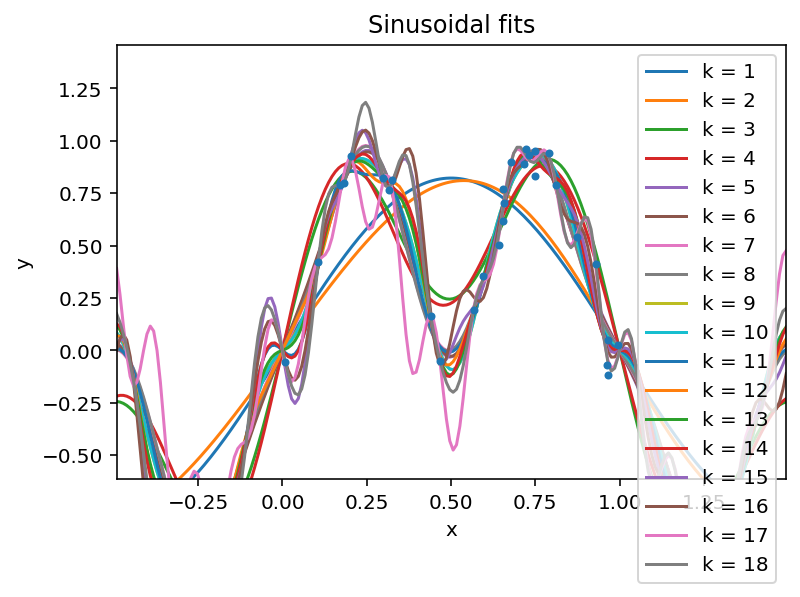

In [22]:
def plot_fitted_sinusoids(x, y, theta_hat):
  """ Plot polynomials of different orders

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    theta_hat (dict): sinusoidal regression weights for different orders
  """

  x_grid = np.linspace(x.min() - .5, x.max() + .5, 200)

  plt.figure()

  for k in theta_hat.keys():
    X_design = make_design_sinusoidal(x_grid, k)
    plt.plot(x_grid, X_design @ theta_hat[k]);

  plt.ylabel('y')
  plt.xlabel('x')
  plt.xlim((x.min() - .5, x.max() + .5))
  plt.ylim((y.min() - .5, y.max() + .5))
  plt.plot(x, y, 'C0.');
  plt.legend([f'k = {o}' for o in theta_hat.keys()], loc=1)
  plt.title('Sinusoidal fits')
  plt.show()

plot_fitted_sinusoids(train_x, train_y, sinusoidal_thetas)

In [23]:
def get_mse_sinusoidal(data, labels, param_dict, log = False, plot = True): # Writing a function so we can use it later
  """Gets and plots the mean squared error for a given dataset and dictionary of 
  sinusoidal fits

  Args:
    data (ndarray): vector of data
    labels (ndarray): vector of measurements or labels y
    param_dict (dict): polynomial regression weights for different orders

  Returns:
    mse_list (list): list of mean squared errors for each degree, with a plot
  """
  mse_list = []
  order_list = [i for i in param_dict.keys()]

  for order in order_list:

    X_design = make_design_sinusoidal(data, order)

    # Get prediction for the polynomial regression model of this order
    y_hat = X_design @ param_dict[order]

    # Compute the residuals
    residuals = labels - y_hat

    # Compute the MSE
    mse = np.mean(residuals ** 2)

    mse_list.append(mse)
  
  # Take the log if needed
  if log == True:
    mse_list = [*map(np.log, mse_list)]
    plt.ylabel('MSE (log)')
  else:
    plt.ylabel('MSE')
  # Now plot everything
  if plot == True:
    plt.plot([*map(str, [i for i in param_dict.keys()])], mse_list);
    plt.xlabel('k Sinusoidal')

  return mse_list

In [24]:
def get_mse_sinusoidal_plots(data, labels, param_dict, alpha = 0.1, log = False, plot = True): # Writing a function so we can use it later
  """Gets and plots the mean squared error for a given dataset and dictionary of 
  sinusoidal fits. Used just for plotting in the 100 runs

  Args:
    data (ndarray): vector of data
    labels (ndarray): vector of measurements or labels y
    param_dict (dict): polynomial regression weights for different orders

  Returns:
    mse_list (list): list of mean squared errors for each degree, with a plot
  """
  mse_list = []
  order_list = [i for i in param_dict.keys()]

  for order in order_list:

    X_design = make_design_sinusoidal(data, order)

    # Get prediction for the polynomial regression model of this order
    y_hat = X_design @ param_dict[order]

    # Compute the residuals
    residuals = labels - y_hat

    # Compute the MSE
    mse = np.mean(residuals ** 2)

    mse_list.append(mse)
  
  # Take the log if needed
  if log == True:
    mse_list = [*map(np.log, mse_list)]
    plt.ylabel('MSE (log)')
  else:
    plt.ylabel('MSE')
  # Now plot everything
  if plot == True:
    plt.plot([*map(str, [i for i in param_dict.keys()])], mse_list, alpha = alpha);
    plt.xlabel('k Sinusoidal')

[-2.2058235166052933,
 -2.217139110103156,
 -3.7305029420628983,
 -3.785652613616869,
 -4.959683954188881,
 -4.962505086509746,
 -4.993218080588908,
 -4.997795222322972,
 -5.114685916849358,
 -5.114690078857646,
 -5.173170122928227,
 -5.2749700112645055,
 -5.295927184325067,
 -5.314117068052783,
 -5.4409534013560155,
 -5.595503095179346,
 -6.19872167952504,
 -6.399691445694674]

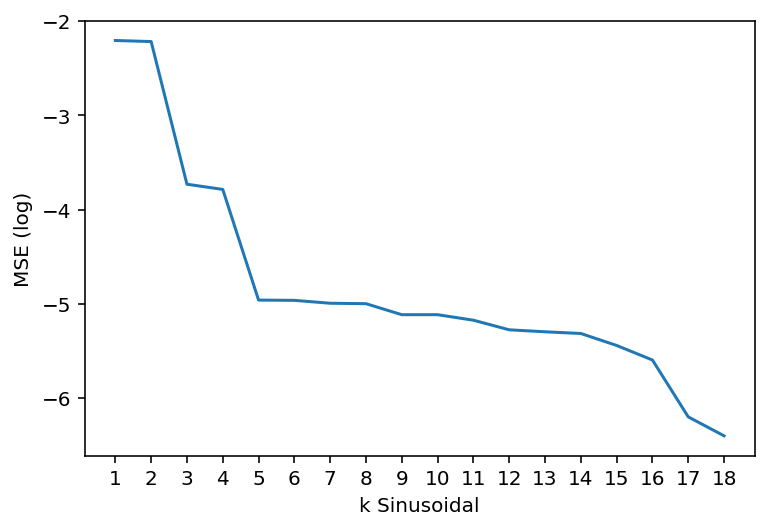

In [25]:
get_mse_sinusoidal(train_x, train_y, sinusoidal_thetas, log = True)

[-1.8797999371134073,
 -1.881967833741255,
 -3.4360776371268815,
 -3.4066144528057603,
 -4.8901270966691195,
 -4.882074866016889,
 -5.0291362726061974,
 -5.011034736386338,
 -4.909363684501509,
 -4.912431381973897,
 -4.8001445417323,
 -4.526358219011789,
 -4.601674930210996,
 -4.495039861169432,
 -3.8082780990682865,
 -3.5949114638565067,
 -3.0585492565740675,
 -3.4975713184975903]

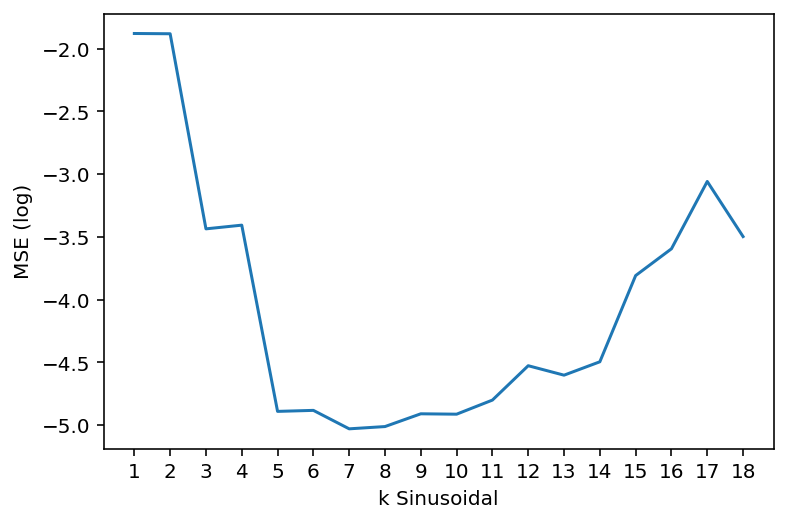

In [26]:
get_mse_sinusoidal(test_x, test_y, sinusoidal_thetas, log = True)

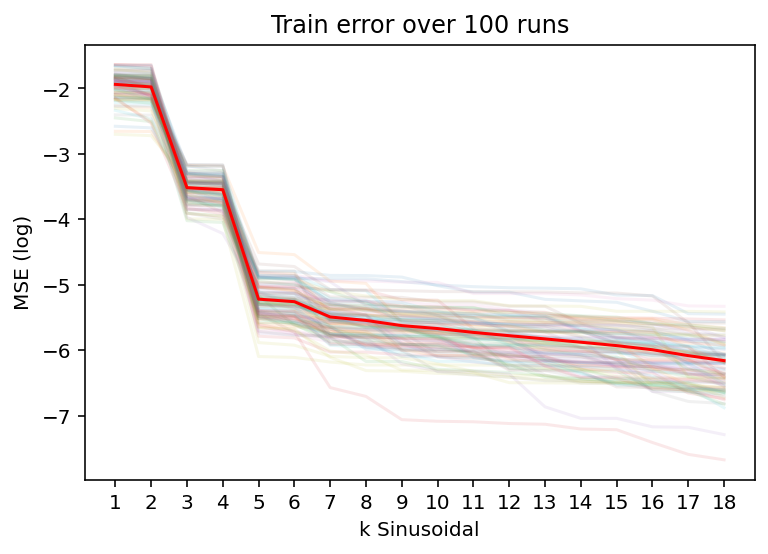

In [27]:
# Part d) Doing 100 runs of the previous for the sinusoidal case
orders = list(range(1, 19))
# First doing 100 trains
mse_train_sin_100 = np.empty((5,1))
thetas_superdict = {} # Need to collect all these thetas in a super-dictionary we can use for train
for epoch in range(100):
  # print(f'Running epoch {epoch}')
  np.random.seed(epoch + 2000) # Set a new seed for each run
  data = np.random.uniform(0, 1, 30) # Sample a random set of data x
  labels = g(data, 0.07) # Generates a random set of labels y
  design_matrix = {order : make_design_sinusoidal(data, order) for order in orders}
  thetas = {order : fit_regression(design_matrix[order], labels) for order in orders}
  thetas_superdict[epoch] = thetas
  mses = np.array(get_mse_sinusoidal(data, labels, thetas, log = False, plot = False))
  get_mse_sinusoidal_plots(data, labels, thetas, alpha = 0.1, log = True, plot = True) # to plot all runs in the background
  if epoch == 0:
    mse_train_sin_100 = mses[:, None]
  else:
      mse_train_sin_100 = np.hstack((mse_train_sin_100, mses[:,None]))
  
plt.ylabel('MSE (log)')
plt.title('Train error over 100 runs')
plt.xlabel('k Sinusoidal')
plt.plot([*map(str, [i for i in thetas.keys()])], np.log(np.mean(mse_train_sin_100, axis = 1)), color = 'red');

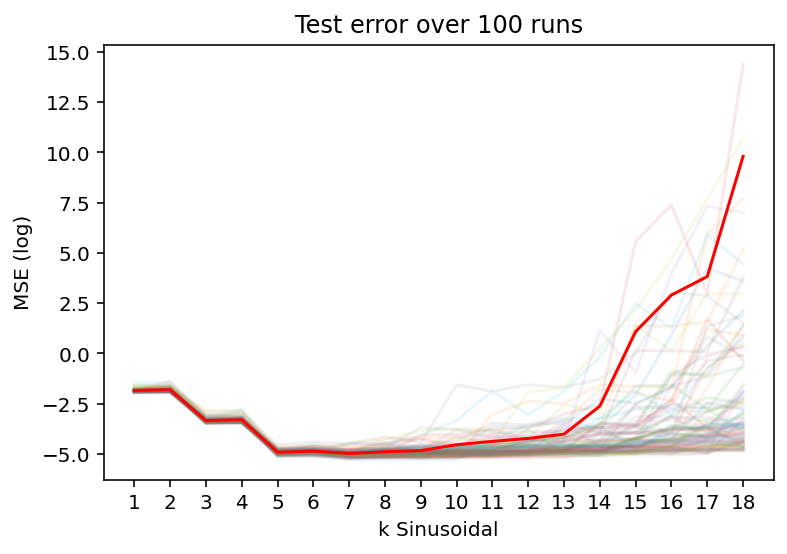

In [28]:
# Part d) Doing 100 runs of the previous for the sinusoidal case
orders = list(range(1, 19))
# First doing 100 trains
mse_test_sin_100 = np.empty((5,1)) # Need to collect all these thetas in a super-dictionary we can use for train
for epoch in range(100):
  # print(f'Running epoch {epoch}')
  np.random.seed(epoch + 2000) # Set a new seed for each run
  data = np.random.uniform(0, 1, 1000) # Sample a random set of data x
  labels = g(data, 0.07) # Generates a random set of labels y
  design_matrix = {order : make_design_sinusoidal(data, order) for order in orders}
  thetas = thetas_superdict[epoch]
  mses = np.array(get_mse_sinusoidal(data, labels, thetas, log = False, plot = False))
  get_mse_sinusoidal_plots(data, labels, thetas, alpha = 0.1, log = True, plot = True) # to plot all runs in the background
  if epoch == 0:
    mse_test_sin_100 = mses[:, None]
  else:
      mse_test_sin_100 = np.hstack((mse_test_sin_100, mses[:,None]))
  
plt.ylabel('MSE (log)')
plt.title('Test error over 100 runs')
plt.xlabel('k Sinusoidal')
plt.plot([*map(str, [i for i in thetas.keys()])], np.log(np.mean(mse_test_sin_100, axis = 1)), color = 'red');